# Preprocessing

In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data=pd.read_csv('banknote.csv', encoding='latin')
print('Shape:', data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(5)

Shape: (1372, 5)


,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,1.0
1,4.54590,8.1674,-2.4586,-1.46210,1.0
2,3.86600,-2.6383,1.9242,0.10645,1.0
3,3.45660,9.5228,-4.0112,-3.59440,1.0
4,0.32924,-4.4552,4.5718,-0.98880,1.0


In [2]:
feature_names=np.array(data.columns)[:-1]
target=data.columns[-1]
Nfeatures=len(feature_names)

print(feature_names)
print(target)
print(Nfeatures)


['variance of Wavelet' 'skewness of Wavelet' 'curtosis of Wavelet'
 'entropy']
class
4


In [3]:
y = data[target]
X = data.drop(axis=1,labels=target,inplace=False)

In [4]:
data.head()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,1.0
1,4.54590,8.1674,-2.4586,-1.46210,1.0
2,3.86600,-2.6383,1.9242,0.10645,1.0
3,3.45660,9.5228,-4.0112,-3.59440,1.0
4,0.32924,-4.4552,4.5718,-0.98880,1.0


In [5]:
colors = ['#DF2020', '#81DF20']
Colorlist=[]
for i in y:
    if i==1.0:
        Colorlist.append(colors[0])
    else:
        Colorlist.append(colors[1])
        

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_2=StandardScaler().fit_transform(X)



# try to use different method of combination/reduction of dimension

# PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=500)


explained_variance_ratio: [0.54497602 0.32328872]


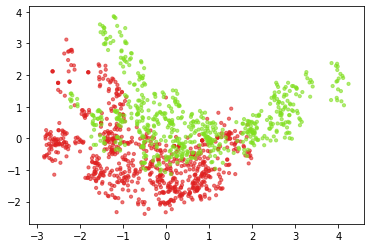

In [8]:
data2=pca.fit_transform(X_2)
print("explained_variance_ratio:",pca.explained_variance_ratio_)
plt.scatter(data2[:,0],data2[:,1],c=Colorlist, alpha = 0.6, s=10)



# MDS

In [9]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2,
                metric = True, #default True
                dissimilarity='euclidean' # default euclidean
               )

stress: 28864.81345612211


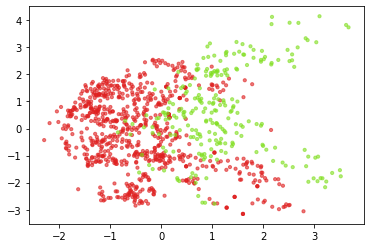

In [10]:
X_mds= embedding.fit_transform(X_2[:1000])
print("stress:",embedding.stress_)
plt.scatter(X_mds[:,0],X_mds[:,1],c=Colorlist[:1000], alpha = 0.6, s=10)

# UMAP

In [11]:
import umap
reducer = umap.UMAP(n_components=2)


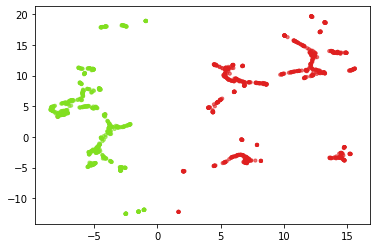

In [12]:
embedding = reducer.fit_transform(X_2)
plt.scatter(embedding[:,0],embedding[:,1],c=Colorlist, alpha = 0.6, s=10)

# t-SNE

In [13]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)

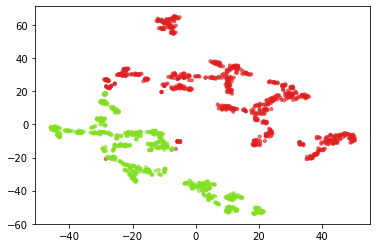

In [18]:
tsne_result = tsne.fit_transform(X_2)
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)



# ===================================================

# we choose t-SNE, because we can see obvious segments

# Clustering

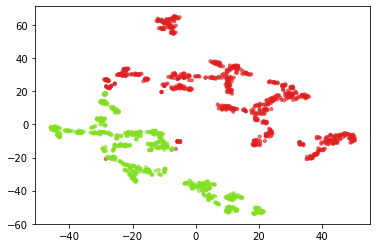

In [91]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

# Now we choose the segment at the top of the graph (y>45), and use Skope-rules

In [109]:
Cluster=np.zeros(len(data))
avp=0

for i in range(len(data)):
    if tsne_result[i][1]>45:
        Cluster[i]=1
        avp+=y[i]
        
print("number of points:", int(Cluster.sum()))
print("average prediction:",avp/Cluster.sum())       

number of points: 77
average prediction: 1.0


In [110]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules


skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, Cluster)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()


Rules

rule: variance of Wavelet > 1.6955000162124634 and skewness of Wavelet > 9.340699672698975 and entropy <= -2.0245500206947327
precision: 1.0
recall: 0.9692307692307692

rule: skewness of Wavelet <= 9.470049858093262 and skewness of Wavelet > 8.994100093841553 and curtosis of Wavelet <= -3.7429999113082886
precision: 1.0
recall: 0.08333333333333333

rule: variance of Wavelet > 2.852199912071228 and skewness of Wavelet <= 9.448299884796143 and skewness of Wavelet > 8.994100093841553
precision: 0.9
recall: 0.06153846153846154




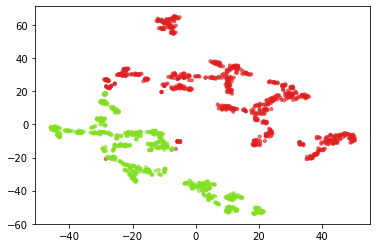

In [111]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

# we choose another segment (-5<x<10, y<-20)

In [113]:
Cluster=np.zeros(len(data))
avp=0

for i in range(len(data)):
    if tsne_result[i][0]<10 and tsne_result[i][0]>-5 and tsne_result[i][1]<-20:
        Cluster[i]=1
        avp+=y[i]
        
print("number of points:", int(Cluster.sum()))
print("average prediction:",avp/Cluster.sum())       

number of points: 96
average prediction: 2.0


In [114]:
skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, Cluster)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: variance of Wavelet <= 0.7257349789142609 and skewness of Wavelet <= -4.725200176239014 and entropy > -0.4204850047826767
precision: 0.9125
recall: 0.9240506329113924

rule: skewness of Wavelet <= -4.725200176239014 and entropy <= 0.024985499097965658 and entropy > -0.6991450190544128
precision: 0.40816326530612246
recall: 0.25

rule: variance of Wavelet <= 0.08335000276565552 and skewness of Wavelet <= -4.535900115966797 and skewness of Wavelet > -5.507399797439575
precision: 0.7333333333333333
recall: 0.14666666666666667




# we can use other cluster method (but not manually)

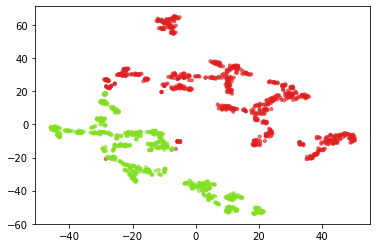

In [115]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

## kmeans

In [116]:
from sklearn.cluster import KMeans

N_clusters=6 # please choose 

kmeans = KMeans(n_clusters=N_clusters, random_state=0)

Cluster_kmeans=kmeans.fit_predict(tsne_result)

In [117]:
a=[]
for i in range(N_clusters):
    a.append([[],[]])

for i in range(len(y)):
        a[Cluster_kmeans[i]][0].append(tsne_result[i][0])
        a[Cluster_kmeans[i]][1].append(tsne_result[i][1])

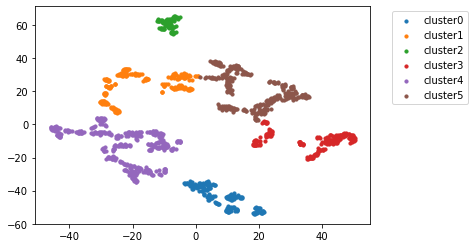

In [118]:
fig=plt.figure()
ax = fig.add_subplot(111)
for i in range(N_clusters):
    ax.scatter(a[i][0],a[i][1],s=10,label='cluster'+str(i))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### we can choose the cluster0

In [119]:
clusterN=0

label_for_skope=np.zeros(len(y))
avp=0
for i in range(len(y)):
    if Cluster_kmeans[i]==clusterN:
        label_for_skope[i]=1
        avp+=y[i]

print("number of points:", int(label_for_skope.sum()))
print("average prediction:",avp/label_for_skope.sum())       

number of points: 180
average prediction: 2.0


In [120]:
skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, label_for_skope)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: variance of Wavelet <= -0.3500399887561798 and skewness of Wavelet <= -4.972499847412109
precision: 1.0
recall: 0.9795918367346939




# another cluster method


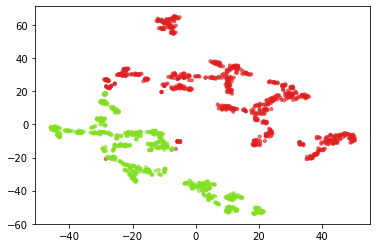

In [121]:
plt.scatter(tsne_result[:,0],tsne_result[:,1],c=Colorlist, alpha = 0.6, s=10)

## dbscan (we need to choose proper value of epsilon and M)

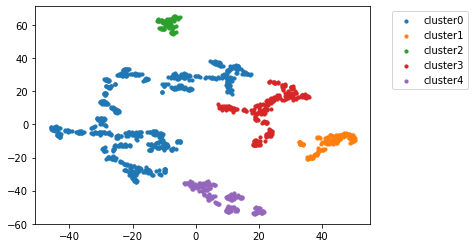

In [122]:
from sklearn.cluster import DBSCAN

epsilon = 6
M = 4

result_dbscan = DBSCAN(eps = epsilon, min_samples = M+1,algorithm='brute').fit_predict(tsne_result)


a=[]
for i in range(len(set(result_dbscan))):
    a.append([[],[]])

for i in range(len(y)):
        a[result_dbscan[i]][0].append(tsne_result[i][0])
        a[result_dbscan[i]][1].append(tsne_result[i][1])

fig=plt.figure()
ax = fig.add_subplot(111)
for i in range(len(set(result_dbscan))):
    ax.scatter(a[i][0],a[i][1],s=10,label='cluster'+str(i))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


### we can choose the cluster1 for skope-rules

In [123]:
clusterN=1

label_for_skope=np.zeros(len(y))
avp=0
for i in range(len(y)):
    if result_dbscan[i]==clusterN:
        label_for_skope[i]=1
        avp+=y[i]

print("number of points:", int(label_for_skope.sum()))
print("average prediction:",avp/label_for_skope.sum())       

number of points: 131
average prediction: 1.0


In [124]:
skp = SkopeRules(
                 max_depth=3,
                 max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.05,
                 feature_names=feature_names
                 )
 
skp.fit(X, label_for_skope)
print("Rules")
print()
for rule in skp.rules_:
    print("rule:" ,rule[0])
    print("precision:",rule[1][0])
    print("recall:", rule[1][1])
    print()
print(20*'=')
print()

Rules

rule: variance of Wavelet > 0.28189999610185623 and skewness of Wavelet <= -2.121050000190735 and curtosis of Wavelet > 1.8153499960899353
precision: 1.0
recall: 0.9814814814814815


